In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
#LOADING BOTH TRAIN AND TEST DATASET
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
#merge the datasets to get more accurate results
data=pd.concat([train,test])

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.shape

(1309, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
#find the percentage of missing values
miss=data.isnull().sum()
misspct= (miss/len(data))*100
print(misspct)

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64


In [13]:
#since cabin has a very high percentage of missing values, we drop it
data=data.drop('Cabin',axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Embarked          3
dtype: int64

In [15]:
data=data.drop(['Name','Ticket'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 102.3+ KB


<Axes: xlabel='Age', ylabel='Count'>

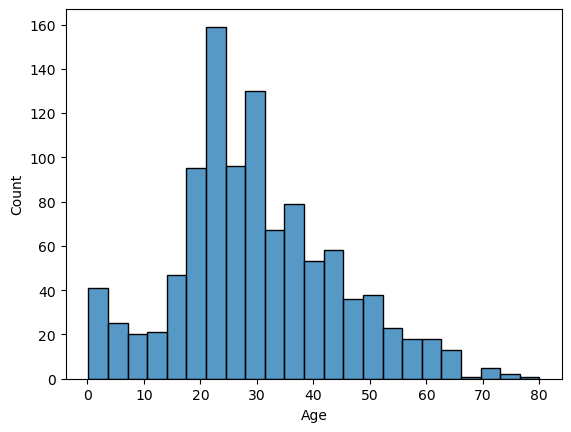

In [17]:
#checking to see if mean or median will be a better fit to replace the missing values
sns.histplot(data['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

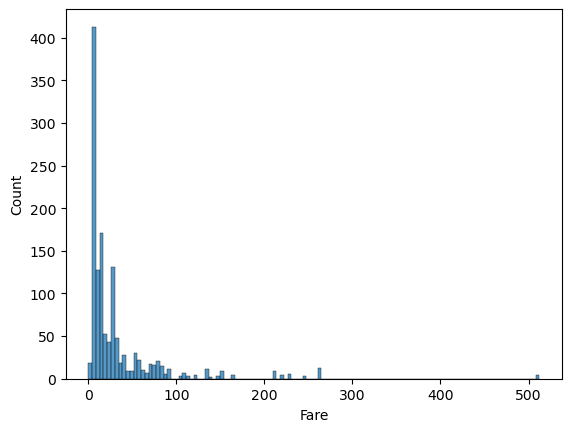

In [18]:
#checking to see if mean or median will be a better fit to replace the missing values
sns.histplot(data['Fare'])

In [19]:
#create a list for numerical dtype
num=[]
cat=[]
for column in data.columns:
    if data[column].dtype!= 'object'and column!= 'Survived':
        num.append(column)
        
    elif column!= 'Survived':
         cat.append(column)
print(num)
print(cat)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']


In [20]:
# Fill missing values for numerical columns with the median
data[num] = data[num].fillna(data[num].median())

# Fill missing values for categorical columns with the mode
data[cat] = data[cat].apply(lambda x: x.fillna(x.mode()[0]))
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [21]:
#split and get the locations for the train data
clean_train=data.iloc[:-418 ,:]
clean_train.shape

(891, 9)

In [22]:
#split and get the locations for the test data
clean_test= data.iloc[891:,:]
clean_test.shape

(418, 9)

In [23]:
#drop the extra axis
clean_test=clean_test.drop('Survived', axis=1)
clean_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [24]:
clean_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [25]:
#check for duplicates
clean_train.duplicated().sum()

0

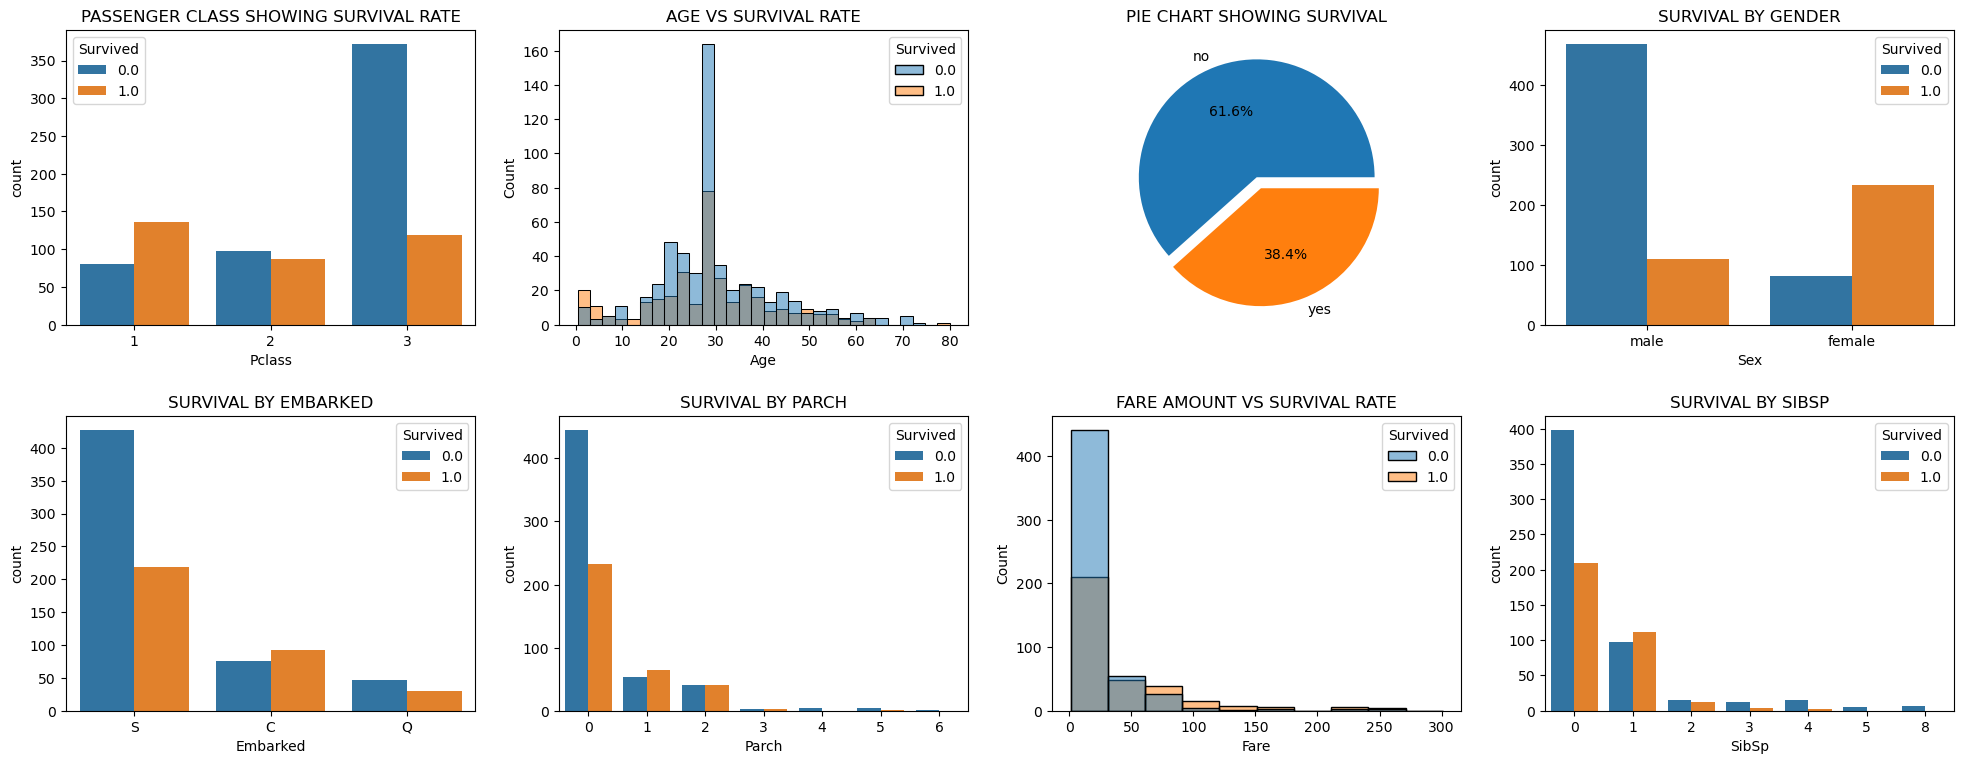

In [26]:
#Create the visualizations of the vaiables to see patterns
fig, ax= plt.subplots( 2,4, figsize=(20,8))
ax[0,0].set_title('PASSENGER CLASS SHOWING SURVIVAL RATE')
sns.countplot(data=clean_train,x='Pclass',hue= 'Survived', ax=ax[0,0])
ax[0,1].set_title('AGE VS SURVIVAL RATE')
sns.histplot(x='Age', data= clean_train, hue='Survived', ax=ax[0,1])
ax[0,2].set_title('PIE CHART SHOWING SURVIVAL')
ax[0,2].pie(x=clean_train['Survived'].value_counts().values, data=clean_train,labels=['no','yes'],autopct='%.1f%%', explode= (clean_train['Survived'].unique())/10)
ax[0,3].set_title('SURVIVAL BY GENDER')
sns.countplot(data=clean_train,x='Sex',hue= 'Survived', ax=ax[0,3])
ax[1,0].set_title('SURVIVAL BY EMBARKED')
sns.countplot(data=clean_train,x='Embarked',hue= 'Survived', ax=ax[1,0])
ax[1,1].set_title('SURVIVAL BY PARCH')
sns.countplot(data=clean_train,x='Parch',hue= 'Survived', ax=ax[1,1])
ax[1,2].set_title('FARE AMOUNT VS SURVIVAL RATE')
sns.histplot(x='Fare', data= clean_train, hue='Survived',binwidth=30,binrange=(1,300), ax=ax[1,2])
ax[1,3].set_title('SURVIVAL BY SIBSP')
sns.countplot(data=clean_train,x='SibSp',hue= 'Survived', ax=ax[1,3])
plt.tight_layout(pad=2)

#### INSIGHTS:

- The majority of the survivors were of first class and a high percentage of 3rd class passengers died
- About 50% of 2nd class pass survived while the rest died
- Only 41.2% of passengers survived
- Passengers with fewer to no parents or Children onboard had the highest likelihood of survival
- Most passengers who paid lesser fare did not survive probably because they were third class passengers and below deck
- Passengers with one or no siblings or spouse onboard had the highest likelihood of survival
- Females had a higher survival rate than males
- More than 50% of the passengers from Cherbourg survived
- 70% of the passengers onboarded at Southhampton and about 60% of them didn't survive though it had the highest number of survivors.


In [27]:
#create a dataframe of the transformed categorical variables
dummies=pd.get_dummies(clean_train[['Sex','Embarked']], drop_first= True,dtype= int)
dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [28]:
#merge the dummies dataframe with the original
clean_train=pd.merge(clean_train, dummies,on=clean_train['PassengerId'])
clean_train=clean_train.drop(['key_0','Sex','Embarked'],axis=1)
clean_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,22.0,1,0,7.2500,1,0,1
1,2,1.0,1,38.0,1,0,71.2833,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,0,0,1
3,4,1.0,1,35.0,1,0,53.1000,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,1,0,1


In [29]:
corr=clean_train.corr()

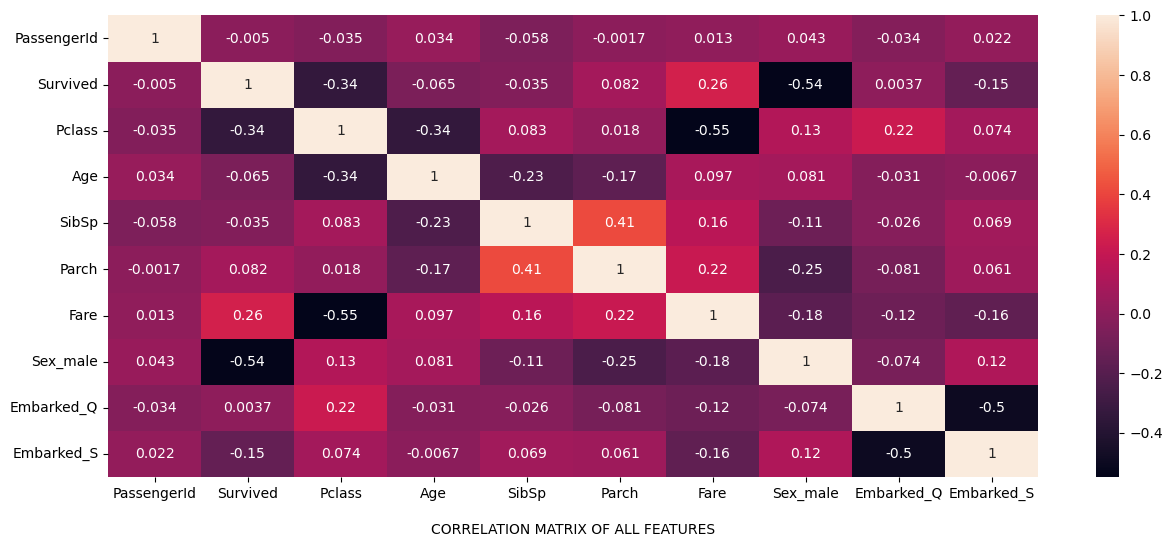

In [30]:
#Visualize the correlation matrix among variables so we can check for multicollinearity
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True)
plt.xlabel("\nCORRELATION MATRIX OF ALL FEATURES")
plt.show()

- Fare and passenger class have a negative correlation,the lower the fare, the lower the class number i.e 7 pounds is equal to third class.
- Male sex and survival also have a negative correlation, meaning that being a male meant lower chances of survival.
- Fare and survived have a positive correlation, meaning The higher the fare, the higher your chances of survival and the higher your class.
- there is a positive correlation between the people that have parents/children onboard to the passengers who have siblings/spouse on board
- The higher the age,most likely the higher the class

In [31]:
#import the necessary libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV,cross_val_score
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score, f1_score

In [32]:
#Drop the passengerID and then duplicates as this will not help our model
clean_train=clean_train.drop('PassengerId', axis=1)
clean_train.drop_duplicates(keep= 'first',inplace=True)

In [33]:
#create the final variables for the model
X =clean_train.drop('Survived', axis=1)
y =clean_train['Survived']
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [34]:
#split the data into training and test to enhance model performance and avoiding overfitting
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [35]:
#create an object from our classification model classes
lr=LogisticRegression(max_iter=1000, random_state=42)
dt=DecisionTreeClassifier(random_state=42)
rf=RandomForestClassifier(random_state=42)
ab=AdaBoostClassifier(random_state=42)
svc=SVC(random_state=42)

In [36]:
#Fit the models to the training data
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
ab.fit(X_train,y_train)
svc.fit(X_train,y_train)

SVC(random_state=42)

In [37]:
#make predictions with all our fitted models
ylr=lr.predict(X_test)
ydt=dt.predict(X_test)
yrf=rf.predict(X_test)
yab=ab.predict(X_test)
ysvc=svc.predict(X_test)

In [38]:
#print classification report to view evaluation metrics
print(classification_report(y_test,ylr))
print(classification_report(y_test,ydt))
print(classification_report(y_test,yrf))
print(classification_report(y_test,yab))
print(classification_report(y_test,ysvc))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        95
         1.0       0.70      0.70      0.70        60

    accuracy                           0.77       155
   macro avg       0.76      0.76      0.76       155
weighted avg       0.77      0.77      0.77       155

              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75        95
         1.0       0.61      0.68      0.65        60

    accuracy                           0.71       155
   macro avg       0.70      0.70      0.70       155
weighted avg       0.72      0.71      0.71       155

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        95
         1.0       0.68      0.68      0.68        60

    accuracy                           0.75       155
   macro avg       0.74      0.74      0.74       155
weighted avg       0.75      0.75      0.75       155

              preci

In [39]:
#calculate cv score for best performing models
crossval=cross_val_score(ab,X_train,y_train, cv=5).mean()
croval=cross_val_score(lr,X_train,y_train, cv=5).mean()
print(f'Cross validation score is {crossval}')
print(f'Cross validation score is {croval}')

Cross validation score is 0.7580645161290323
Cross validation score is 0.7790322580645161


In [40]:
#create a dataframe for the ratings of the features according to our Adaboost model
featimp=pd.DataFrame({'features': X.columns,'importance': ab.feature_importances_
                     }).sort_values(by='importance', ascending=False).reset_index()
featimp.head(4)

,index,features,importance
0,1,Age,0.42
1,4,Fare,0.32
2,2,SibSp,0.10
3,5,Sex_male,0.06


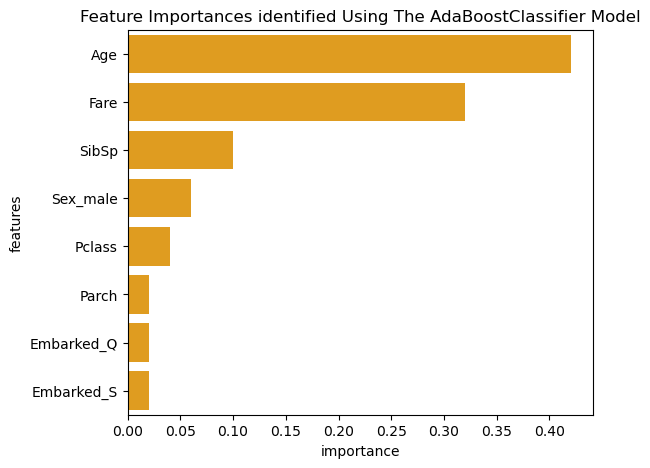

In [41]:
#A more stylish visualization of the info
plt.figure(figsize=(6,5))
sns.barplot(data=featimp, x='importance', y='features', color='orange')
plt.title('Feature Importances identified Using The AdaBoostClassifier Model')
plt.show()

In [48]:
#create a dataframe for the ratings of the features according to our logistic regression model
featimplog=pd.DataFrame({'features': X.columns,'importance': lr.coef_[0]
                     }).sort_values(by='importance', ascending=False).reset_index()
featimplog.head(4)

,index,features,importance
0,4,Fare,0.001363
1,1,Age,-0.039730
2,3,Parch,-0.046790
3,2,SibSp,-0.394936


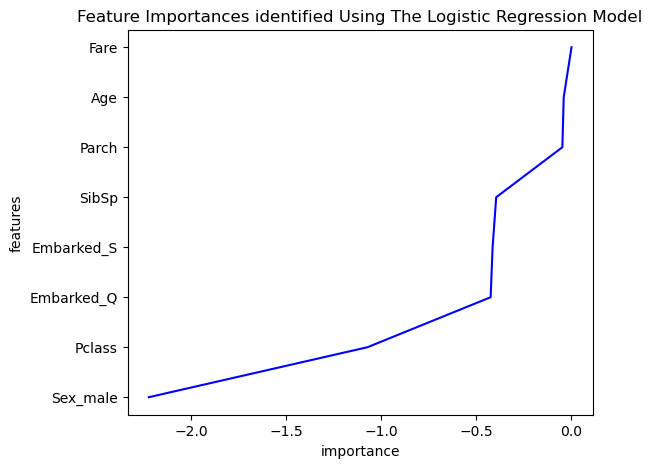

In [43]:
#A more stylish visualization of the feature importance of the logistic regression model
plt.figure(figsize=(6,5))
sns.lineplot(data=featimplog, x='importance', y='features', color='blue')
plt.title('Feature Importances identified Using The Logistic Regression Model')
plt.show()

####  From our two best performing models, we can see that Fare,Age and SibSp are part of the top four features that our models take into consideration.